In [70]:
include("./../src/MD_LJ.jl")

Main.MD_LJ

In [71]:
lattice = MD_LJ.SquareLattice(9,9, 64,1.0)

initial_positions, initial_velocities = lattice.positions, lattice.velocities
println("Initial Positions:")

display(initial_positions)
println("Initial Velocities:")
display(initial_velocities)

println(typeof(initial_positions))
println(typeof(initial_velocities))

64-element Vector{Vector{Float64}}:
 [1.0, 1.0]
 [1.0, 2.0]
 [1.0, 3.0]
 [1.0, 4.0]
 [1.0, 5.0]
 [1.0, 6.0]
 [1.0, 7.0]
 [1.0, 8.0]
 [2.0, 1.0]
 [2.0, 2.0]
 ⋮
 [7.0, 8.0]
 [8.0, 1.0]
 [8.0, 2.0]
 [8.0, 3.0]
 [8.0, 4.0]
 [8.0, 5.0]
 [8.0, 6.0]
 [8.0, 7.0]
 [8.0, 8.0]

64×2 Matrix{Float64}:
 -0.636264   -0.82615
  0.651536    1.90804
 -1.45012     0.685167
 -2.04549    -0.617522
  0.15285    -1.35649
  0.288732   -0.693621
  0.263774    0.780968
  1.50969     0.640021
 -1.10017     0.655457
  1.29215     0.27698
  ⋮          
  0.74694    -0.239337
  2.5931      0.756687
  0.725014    1.53748
 -0.123103    0.166012
  0.0579004  -0.340808
  2.74763     1.26721
  1.44832    -0.364556
 -1.57055    -1.10758
 -1.36471     1.40995

Total Linear Momentum: [0.0 0.0]
Initial Positions:
Initial Velocities:
Vector{Vector{Float64}}
Matrix{Float64}


In [72]:
N = 64
Lx = 9
Ly = 9
L = Lx
tau = 0.001
steps = 200
total_steps = 2000

# Generate initial positions and velocities
lattice = MD_LJ.SquareLattice(9, 9, 64, 1.0)
rcut = 2.5
fc = 24 * (2 * (1 / rcut)^12 - (1 / rcut)^6) / rcut
Vc = 4 * ((1 / rcut)^12 - (1 / rcut)^6)
positions, velocities = lattice.positions, lattice.velocities
kinetic_energy, potential_energy = MD_LJ.calculate_energy(positions, velocities, L, Vc, fc, rcut)
forces = MD_LJ.calculate_forces(positions, L, fc)

Total Linear Momentum: [0.0 0.0]


64-element Vector{Any}:
 (23.2284230519808, 23.228423051980805)
 (22.180208129433602, 24.210781904433603)
 (22.181422006886404, 24.325352581886403)
 (22.181422006886404, 24.325352581886403)
 (22.181422006886404, 24.325352581886403)
 (22.181422006886404, 24.325352581886403)
 (22.141208651980804, 24.504565451980802)
 (23.110210742169603, 1.5491387421695992)
 (22.8932122720752, 23.188209697075205)
 (21.7304266720752, 24.093783472075202)
 ⋮
 (22.9542128323584, 1.3175696323583992)
 (0.11699843235840003, 24.116998432358404)
 (0.07799895490560002, 23.896358329905603)
 (0.07799895490560002, 23.896358329905603)
 (0.07799895490560002, 23.896358329905603)
 (0.07799895490560002, 23.896358329905603)
 (0.07799895490560002, 23.896358329905603)
 (0.03899947745280001, 24.0389994774528)
 (0.0, 0.0)

In [73]:
new_positions, new_velocities, new_forces = MD_LJ.verlet_integration(positions, velocities, forces, L, tau,fc)

([[1.0009868715260457, 0.9998404912633794], [1.0009596147046878, 2.0007204008168418], [0.999935148441202, 2.9996636185406964], [1.0017259455254923, 3.9993284412221737], [1.0011366478991774, 5.001297539806202], [1.000364992481878, 5.999394958634266], [0.9991947379024453, 7.002244312568277], [1.0020444669096489, 8.000107332641527], [1.9993537361320772, 0.9992572227468018], [1.9998993549639312, 2.0003480250463492]  …  [6.9987590935998645, 6.999512496172128], [7.001120513089724, 8.000317761755076], [7.998681870233054, 1.0005661278339415], [8.000570240001547, 1.9992228857663268], [8.00101177623568, 3.00136433349534], [7.999020795187118, 3.998466840365381], [8.002258976007065, 5.002122047128802], [8.000071892535049, 5.999712021496527], [8.000129331918629, 6.998930873323087], [8.000222282675354, 8.001279251334367]], [0.9988608211460112 -0.14810224822808682; 0.9709334267147594 0.7327425623356775; … ; 0.12935248244408862 -1.0576325439874505; 0.22228267535335205 1.2792513343660614], Any[(23.9785

In [74]:
positions_final, velocities_final = MD_LJ.md_simulation(positions, velocities, L, tau, steps, 10, 1000, fc, Vc, rcut)

kinetic_energy_final, potential_energy_final = MD_LJ.calculate_energy(positions_final, velocities_final, Lx, Vc, fc, rcut)
total_energy_final = kinetic_energy_final + potential_energy_final
temperature_final = (2 / (3 * N)) * kinetic_energy_final

println("Equilibrium reached in steps.")
println("Kinetic Energy: $kinetic_energy_final")
println("Potential Energy: $potential_energy_final")
println("Total Energy: $total_energy_final")
println("Temperature: $temperature_final")


Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7
Step 8
Step 9
Step 10
Step 10: Mean Temperature = 0.6370871109579787, Mean Pressure = -43430.27356526936
step 10: kinetic_energy = 64.50811413437363, potential_energy = -106.48177752571932
Step 11
Step 12
Step 13
Step 14
Step 15


Step 16
Step 17
Step 18
Step 19
Step 20
Step 20: Mean Temperature = 0.7692867654083797, Mean Pressure = -49819.33011269734
step 20: kinetic_energy = 84.12237356366415, potential_energy = -85.65235429863179
Step 21
Step 22
Step 23
Step 24
Step 25
Step 26
Step 27
Step 28
Step 29
Step 30
Step 30: Mean Temperature = 1.1022285427387275, Mean Pressure = -62362.220430199115
step 30: kinetic_energy = 128.95057370709833, potential_energy = -39.16665886425935
Step 31
Step 32
Step 33
Step 34
Step 35
Step 36
Step 37
Step 38
Step 39
Step 40
Step 40: Mean Temperature = 1.892884448932794, Mean Pressure = -99784.71966354238
step 40: kinetic_energy = 243.52173879787577, potential_energy = 79.06173812623678
Step 41
Step 42
Step 43
Step 44
Step 45
Step 46
Step 47


Step 48
Step 49
Step 50
Step 50: Mean Temperature = 6.248259424626229, Mean Pressure = -438873.4045594701
step 50: kinetic_energy = 1656.3584578443474, potential_energy = 1425.3958828716989
Step 51
Step 52
Step 53
Step 54
Step 55
Step 56
Step 57
Step 58
Step 59
Step 60
Step 60: Mean Temperature = 2.6641961227628738e8, Mean Pressure = 7.690952831473617e11
step 60: kinetic_energy = 1.1050700918984091e11, potential_energy = 1.3801070609460701e6
Step 61
Step 62
Step 63
Step 64
Step 65
Step 66
Step 67
Step 68
Step 69
Step 70
Step 70: Mean Temperature = 1.5125956442627263e22, Mean Pressure = 7.762127013964385e25
step 70: kinetic_energy = 4.4662650186030644e24, potential_energy = -2.199309627934314e10
Step 71
Step 72
Step 73
Step 74
Step 75
Step 76
Step 77
Step 78
Step 79


Step 80
Step 80: Mean Temperature = 5.327814335085511e22, Mean Pressure = -5.796336018771313e33
step 80: kinetic_energy = 5.86778493580671e24, potential_energy = -1.304557192111979e11
Step 81
Step 82
Step 83
Step 84
Step 85
Step 86
Step 87
Step 88
Step 89
Step 90
Step 90: Mean Temperature = 6.142511196488205e22, Mean Pressure = -2.725897910518487e32
step 90: kinetic_energy = 5.914255725378216e24, potential_energy = -1.7764836282569232e11
Step 91
Step 92
Step 93
Step 94
Step 95
Step 96
Step 97
Step 98
Step 99
Step 100
Step 100: Mean Temperature = 6.160728973004412e22, Mean Pressure = 4.6261006459882e32
step 100: kinetic_energy = 5.914301219172766e24, potential_energy = -4.202106384824458e11
Step 101
Step 102
Step 103
Step 104
Step 105
Step 106
Step 107
Step 108
Step 109
Step 110
Step 110: Mean Temperature = 6.160730436677291e22, Mean Pressure = 7.443240094165572e27
step 110: kinetic_energy = 5.914301219459584e24, potential_energy = -5.659569967217628e11
Step 111
Step 112


Step 113
Step 114
Step 115
Step 116
Step 117
Step 118
Step 119
Step 120
Step 120: Mean Temperature = 1.7669410388213693e27, Mean Pressure = 2.560123867097281e36
step 120: kinetic_energy = 2.3396512178482684e29, potential_energy = -1.2460975942141133e13
Step 121
Step 122
Step 123
Step 124
Step 125
Step 126
Step 127
Step 128
Step 129
Step 130
Step 130: Mean Temperature = 2.4371366852586156e27, Mean Pressure = -3.630695562043527e33
step 130: kinetic_energy = 2.339651217848273e29, potential_energy = -2.9410873283310156e13
Step 131
Step 132
Step 133
Step 134
Step 135
Step 136
Step 137
Step 138
Step 139
Step 140
Step 140: Mean Temperature = 2.4371366852586176e27, Mean Pressure = 1.8845444065865532e27
step 140: kinetic_energy = 2.339651217848273e29, potential_energy = -4.636077548234744e13
Step 141
Step 142
Step 143
Step 144
Step 145
Step 146


Step 147
Step 148
Step 149
Step 150
Step 150: Mean Temperature = 2.4371366852586176e27, Mean Pressure = 1.925242131969919e27
step 150: kinetic_energy = 2.339651217848273e29, potential_energy = -6.331067940606179e13
Step 151
Step 152
Step 153
Step 154
Step 155
Step 156
Step 157
Step 158
Step 159
Step 160
Step 160: Mean Temperature = 2.437136685260582e27, Mean Pressure = 1.9242184304933006e27
step 160: kinetic_energy = 2.3396512178512914e29, potential_energy = -8.026059198712138e13
Step 161
Step 162
Step 163
Step 164
Step 165
Step 166
Step 167
Step 168
Step 169
Step 170
Step 170: Mean Temperature = 2.4371366852617613e27, Mean Pressure = 1.9713932453083418e27
step 170: kinetic_energy = 2.3396512178512914e29, potential_energy = -9.721051121574678e13
Step 171
Step 172
Step 173
Step 174
Step 175
Step 176
Step 177


Step 178
Step 179
Step 180
Step 180: Mean Temperature = 2.437136685262038e27, Mean Pressure = -1.0055179126958204e34
step 180: kinetic_energy = 2.339651217853414e29, potential_energy = -1.1416043188964178e14
Step 181
Step 182
Step 183
Step 184
Step 185
Step 186
Step 187
Step 188
Step 189
Step 190
Step 190: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9211860467015828e27
step 190: kinetic_energy = 2.339651217853414e29, potential_energy = -1.3111036267666328e14
Step 191
Step 192
Step 193
Step 194
Step 195
Step 196
Step 197
Step 198
Step 199
Step 200
Step 200: Mean Temperature = 2.437136685263973e27, Mean Pressure = -2.0904639318271914e31
step 200: kinetic_energy = 2.339651217853414e29, potential_energy = -1.4806029426689556e14
Step 201
Step 202


Step 203
Step 204
Step 205
Step 206
Step 207
Step 208
Step 209
Step 210
Step 210: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9253087647326644e27
step 210: kinetic_energy = 2.339651217853414e29, potential_energy = -1.6501022621795706e14
Step 211
Step 212
Step 213
Step 214
Step 215
Step 216
Step 217
Step 218
Step 219
Step 220
Step 220: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9253459141344838e27
step 220: kinetic_energy = 2.339651217853414e29, potential_energy = -1.8196015843624966e14
Step 221
Step 222
Step 223
Step 224
Step 225
Step 226
Step 227
Step 228
Step 229
Step 230
Step 230: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.925374612056118e27
step 230: kinetic_energy = 2.339651217853414e29, potential_energy = -1.9891009086633038e14
Step 231
Step 232
Step 233
Step 234


Step 235
Step 236
Step 237
Step 238
Step 239
Step 240
Step 240: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9253912833880477e27
step 240: kinetic_energy = 2.339651217853414e29, potential_energy = -2.1586002346830934e14
Step 241
Step 242
Step 243
Step 244
Step 245
Step 246
Step 247
Step 248
Step 249
Step 250
Step 250: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9254109363120924e27
step 250: kinetic_energy = 2.339651217853414e29, potential_energy = -2.3280995621236056e14
Step 251
Step 252
Step 253
Step 254
Step 255
Step 256
Step 257
Step 258
Step 259
Step 260
Step 260: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9253898497567198e27
step 260: kinetic_energy = 2.339651217853414e29, potential_energy = -2.4975988907565234e14
Step 261
Step 262
Step 263
Step 264
Step 265
Step 266
Step 267
Step 268


Step 269
Step 270
Step 270: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9254494470357354e27
step 270: kinetic_energy = 2.339651217853414e29, potential_energy = -2.6670982204037322e14
Step 271
Step 272
Step 273
Step 274
Step 275
Step 276
Step 277
Step 278
Step 279
Step 280
Step 280: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.925469636207656e27
step 280: kinetic_energy = 2.339651217853414e29, potential_energy = -2.836597550923858e14
Step 281
Step 282
Step 283
Step 284
Step 285
Step 286
Step 287
Step 288
Step 289
Step 290
Step 290: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9254904565281192e27
step 290: kinetic_energy = 2.339651217853414e29, potential_energy = -3.0060968822029725e14
Step 291
Step 292
Step 293
Step 294
Step 295
Step 296
Step 297
Step 298
Step 299
Step 300


Step 300: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.925510929884954e27
step 300: kinetic_energy = 2.339651217853414e29, potential_energy = -3.1755962141479156e14
Step 301
Step 302
Step 303
Step 304
Step 305
Step 306
Step 307
Step 308
Step 309
Step 310
Step 310: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9255307727716062e27
step 310: kinetic_energy = 2.339651217853414e29, potential_energy = -3.345095546681289e14
Step 311
Step 312
Step 313
Step 314
Step 315
Step 316
Step 317
Step 318
Step 319
Step 320
Step 320: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9255497594286382e27
step 320: kinetic_energy = 2.339651217853414e29, potential_energy = -3.5145948797379006e14
Step 321
Step 322
Step 323
Step 324
Step 325
Step 326
Step 327
Step 328
Step 329
Step 330
Step 330: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9255677162318718e27
step 330: kinetic_energy = 2.339651217853414e29, potential_energy = -3.684094213262068e14
Step 331
Step

Step 334
Step 335
Step 336
Step 337
Step 338
Step 339
Step 340
Step 340: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9255845160170585e27
step 340: kinetic_energy = 2.339651217853414e29, potential_energy = -3.853593547205627e14
Step 341
Step 342
Step 343
Step 344
Step 345
Step 346
Step 347
Step 348
Step 349
Step 350
Step 350: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.925599257887524e27
step 350: kinetic_energy = 2.339651217853414e29, potential_energy = -4.0230928815265156e14
Step 351
Step 352
Step 353
Step 354
Step 355
Step 356
Step 357
Step 358
Step 359
Step 360
Step 360: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256090735946837e27
step 360: kinetic_energy = 2.339651217853414e29, potential_energy = -4.1925922161877244e14
Step 361
Step 362
Step 363
Step 364


Step 365
Step 366
Step 367
Step 368
Step 369
Step 370
Step 370: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256202064303597e27
step 370: kinetic_energy = 2.339651217853414e29, potential_energy = -4.362091551156407e14
Step 371
Step 372
Step 373
Step 374
Step 375
Step 376
Step 377
Step 378
Step 379
Step 380
Step 380: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256302363439974e27
step 380: kinetic_energy = 2.339651217853414e29, potential_energy = -4.5315908864033775e14
Step 381
Step 382
Step 383
Step 384
Step 385
Step 386
Step 387
Step 388
Step 389
Step 390
Step 390: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256391716981418e27
step 390: kinetic_energy = 2.339651217853414e29, potential_energy = -4.701090221902617e14
Step 391
Step 392
Step 393
Step 394
Step 395
Step 396
Step 397


Step 398
Step 399
Step 400
Step 400: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256470432118178e27
step 400: kinetic_energy = 2.339651217853414e29, potential_energy = -4.8705895576309056e14
Step 401
Step 402
Step 403
Step 404
Step 405
Step 406
Step 407
Step 408
Step 409
Step 410
Step 410: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256539006611653e27
step 410: kinetic_energy = 2.339651217853414e29, potential_energy = -5.040088893567464e14
Step 411
Step 412
Step 413
Step 414
Step 415
Step 416
Step 417
Step 418
Step 419
Step 420
Step 420: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256598093596651e27
step 420: kinetic_energy = 2.339651217853414e29, potential_energy = -5.2095882296937425e14
Step 421
Step 422
Step 423
Step 424
Step 425
Step 426
Step 427
Step 428
Step 429


Step 430
Step 430: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256648465424372e27
step 430: kinetic_energy = 2.339651217853414e29, potential_energy = -5.3790875659931594e14
Step 431
Step 432
Step 433
Step 434
Step 435
Step 436
Step 437
Step 438
Step 439
Step 440
Step 440: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256690977851794e27
step 440: kinetic_energy = 2.339651217853414e29, potential_energy = -5.5485869024508344e14
Step 441
Step 442
Step 443
Step 444
Step 445
Step 446
Step 447
Step 448
Step 449
Step 450
Step 450: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256726535838376e27
step 450: kinetic_energy = 2.339651217853414e29, potential_energy = -5.718086239053469e14
Step 451
Step 452
Step 453
Step 454
Step 455
Step 456
Step 457
Step 458
Step 459
Step 460
Step 460: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256756062071352e27
step 460: kinetic_energy = 2.339651217853414e29, potential_energy = -5.887585575789126e14
Ste

Step 462
Step 463
Step 464
Step 465
Step 466
Step 467
Step 468
Step 469
Step 470
Step 470: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.925678046912662e27
step 470: kinetic_energy = 2.339651217853414e29, potential_energy = -6.057084912647124e14
Step 471
Step 472
Step 473
Step 474
Step 475
Step 476
Step 477
Step 478
Step 479
Step 480
Step 480: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.925680063591045e27
step 480: kinetic_energy = 2.339651217853414e29, potential_energy = -6.226584249617765e14
Step 481
Step 482
Step 483
Step 484
Step 485
Step 486
Step 487
Step 488
Step 489
Step 490
Step 490: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.925689383789495e27
step 490: kinetic_energy = 2.339651217853414e29, potential_energy = -6.396083586692436e14
Step 491
Step 492
Step 493


Step 494
Step 495
Step 496
Step 497
Step 498
Step 499
Step 500
Step 500: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256859057361138e27
step 500: kinetic_energy = 2.339651217853414e29, potential_energy = -6.565582923863332e14
Step 501
Step 502
Step 503
Step 504
Step 505
Step 506
Step 507
Step 508
Step 509
Step 510
Step 510: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.925684355962152e27
step 510: kinetic_energy = 2.339651217853414e29, potential_energy = -6.735082261123301e14
Step 511
Step 512
Step 513
Step 514
Step 515
Step 516
Step 517
Step 518
Step 519
Step 520
Step 520: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256867542217776e27
step 520: kinetic_energy = 2.339651217853414e29, potential_energy = -6.904581598466006e14
Step 521
Step 522
Step 523
Step 524


Step 525
Step 526
Step 527
Step 528
Step 529
Step 530
Step 530: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256867515910242e27
step 530: kinetic_energy = 2.339651217853414e29, potential_energy = -7.074080935885602e14
Step 531
Step 532
Step 533
Step 534
Step 535
Step 536
Step 537
Step 538
Step 539
Step 540
Step 540: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.925686183628569e27
step 540: kinetic_energy = 2.339651217853414e29, potential_energy = -7.243580273376826e14
Step 541
Step 542
Step 543
Step 544
Step 545
Step 546
Step 547
Step 548
Step 549
Step 550
Step 550: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256855740825718e27
step 550: kinetic_energy = 2.339651217853414e29, potential_energy = -7.413079610934898e14
Step 551
Step 552
Step 553
Step 554


Step 555
Step 556
Step 557
Step 558
Step 559
Step 560
Step 560: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256849648944092e27
step 560: kinetic_energy = 2.339651217853414e29, potential_energy = -7.582578948555349e14
Step 561
Step 562
Step 563
Step 564
Step 565
Step 566
Step 567
Step 568
Step 569
Step 570
Step 570: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256843904161764e27
step 570: kinetic_energy = 2.339651217853414e29, potential_energy = -7.752078286234269e14
Step 571
Step 572
Step 573
Step 574
Step 575
Step 576
Step 577
Step 578
Step 579
Step 580
Step 580: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256838780087478e27
step 580: kinetic_energy = 2.339651217853414e29, potential_energy = -7.921577623967932e14
Step 581
Step 582
Step 583
Step 584
Step 585


Step 586
Step 587
Step 588
Step 589
Step 590
Step 590: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.925683448722497e27
step 590: kinetic_energy = 2.339651217853414e29, potential_energy = -8.091076961752968e14
Step 591
Step 592
Step 593
Step 594
Step 595
Step 596
Step 597
Step 598
Step 599
Step 600
Step 600: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256831180202153e27
step 600: kinetic_energy = 2.339651217853414e29, potential_energy = -8.26057629958627e14
Step 601
Step 602
Step 603
Step 604
Step 605
Step 606
Step 607
Step 608
Step 609
Step 610
Step 610: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.925682896508827e27
step 610: kinetic_energy = 2.339651217853414e29, potential_energy = -8.430075637465002e14
Step 611
Step 612
Step 613
Step 614
Step 615
Step 616
Step 617
Step 618


Step 619
Step 620
Step 620: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.925682790653631e27
step 620: kinetic_energy = 2.339651217853414e29, potential_energy = -8.599574975386546e14
Step 621
Step 622
Step 623
Step 624
Step 625
Step 626
Step 627
Step 628
Step 629
Step 630
Step 630: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256828034554554e27
step 630: kinetic_energy = 2.339651217853414e29, potential_energy = -8.769074313348455e14
Step 631
Step 632
Step 633
Step 634
Step 635
Step 636
Step 637
Step 638
Step 639
Step 640
Step 640: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.925682935077107e27
step 640: kinetic_energy = 2.339651217853414e29, potential_energy = -8.938573651348458e14
Step 641
Step 642
Step 643
Step 644
Step 645
Step 646
Step 647
Step 648
Step 649


Step 650
Step 650: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256831834106512e27
step 650: kinetic_energy = 2.339651217853414e29, potential_energy = -9.108072989384528e14
Step 651
Step 652
Step 653
Step 654
Step 655
Step 656
Step 657
Step 658
Step 659
Step 660
Step 660: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256835445812911e27
step 660: kinetic_energy = 2.339651217853414e29, potential_energy = -9.277572327454684e14
Step 661
Step 662
Step 663
Step 664
Step 665
Step 666
Step 667
Step 668
Step 669
Step 670
Step 670: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.925684013386976e27
step 670: kinetic_energy = 2.339651217853414e29, potential_energy = -9.447071665557156e14
Step 671
Step 672
Step 673
Step 674
Step 675
Step 676
Step 677
Step 678
Step 679
Step 680
Step 680: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.925685257730167e27
step 680: kinetic_energy = 2.339651217853414e29, potential_energy = -9.616571003690252e14
Step 68

Step 683
Step 684
Step 685
Step 686
Step 687
Step 688
Step 689
Step 690
Step 690: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256907541988158e27
step 690: kinetic_energy = 2.339651217853414e29, potential_energy = -9.786070341852451e14
Step 691
Step 692
Step 693
Step 694
Step 695
Step 696
Step 697
Step 698
Step 699
Step 700
Step 700: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256541434081476e27
step 700: kinetic_energy = 2.339651217853414e29, potential_energy = -9.955569680042232e14
Step 701
Step 702
Step 703
Step 704
Step 705
Step 706
Step 707
Step 708
Step 709
Step 710
Step 710: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256388624307937e27
step 710: kinetic_energy = 2.339651217853414e29, potential_energy = -1.0125069018258311e15
Step 711
Step 712
Step 713
Step 714


Step 715
Step 716
Step 717
Step 718
Step 719
Step 720
Step 720: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256388624307937e27
step 720: kinetic_energy = 2.339651217853414e29, potential_energy = -1.0294568356499395e15
System is stable. Stability counter = 1
Step 721
Step 722
Step 723
Step 724
Step 725
Step 726
Step 727
Step 728
Step 729
Step 730
Step 730: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256388624307937e27
step 730: kinetic_energy = 2.339651217853414e29, potential_energy = -1.0464067694764285e15
System is stable. Stability counter = 2
Step 731
Step 732
Step 733
Step 734
Step 735
Step 736
Step 737
Step 738
Step 739
Step 740
Step 740: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256388624307937e27
step 740: kinetic_energy = 2.339651217853414e29, potential_energy = -1.0633567033051911e15
System is stable. Stability counter = 3
Step 741
Step 742
Step 743
Step 744
Step 745
Step 746
Step 747
Step 748


Step 749
Step 750
Step 750: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256388624307937e27
step 750: kinetic_energy = 2.339651217853414e29, potential_energy = -1.0803066371361142e15
System is stable. Stability counter = 4
Step 751
Step 752
Step 753
Step 754
Step 755
Step 756
Step 757
Step 758
Step 759
Step 760
Step 760: Mean Temperature = 2.437136685263973e27, Mean Pressure = 1.9256388624307937e27
step 760: kinetic_energy = 2.339651217853414e29, potential_energy = -1.0972565709691064e15
System is stable. Stability counter = 5
System has reached equilibrium. Stopping simulation.
Equilibrium reached in steps.
Kinetic Energy: 2.339651217853414e29
Potential Energy: -1.095561577585715e15
Total Energy: 2.3396512178534032e29
Temperature: 2.437136685263973e27


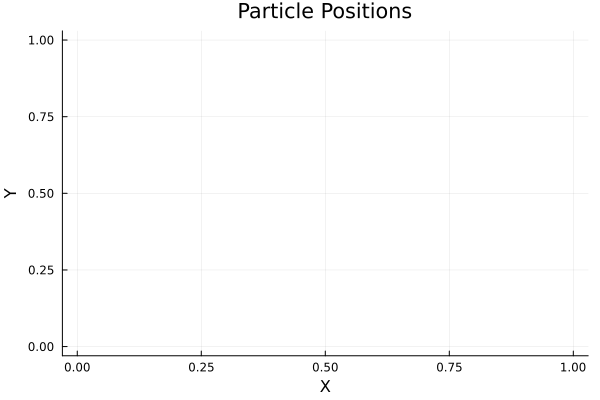

In [40]:
using Plots
scatter([pos[1] for pos in positions_final], [pos[2] for pos in positions_final], xlabel="X", ylabel="Y", title="Particle Positions", legend=false)


In [41]:
N = 64 
using LinearAlgebra
vx = randn(N)  
vy = randn(N) 
nbin = 32
dvel = 0.16
num_steps = 1000
m = 1.0  # Particle mass
kB = 1.0  # Boltzmann constant
T = 300.0  # Temperature

# Call the function to get the data
v_squared, prob, theoretical_prob ,v_values= MD_LJ.compute_equilibrium_prob(N, vx, vy, nbin, dvel, num_steps, m, kB, T)
println(" Probability:")
println(" ********************************")
# println(prob)
println(norm(prob.-theoretical_prob))
println(" ********************************")
# Plot the results
v_values = collect(0:dvel:(nbin - 1) * dvel)
plot(v_values, prob, xlabel="v", ylabel="P(v)", label="Simulation")
plot!(v_values, theoretical_prob, label="Maxwell-Boltzmann Distribution")

Lx = Ly = 10.0  
nbin = 1000 
gcum = zeros(Float64, nbin)  
ncorrel = 1000 
dr = 0.025 


MD_LJ.normalize_g(ncorrel, N, Lx, Ly, gcum, dr,nbin)
N=10
x = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]  
y = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
MD_LJ.compute_g(ncorrel, x, y, N, Lx, Ly, gcum, nbin, dr)

 Probability:
 ********************************
1.8217119226698952
 ********************************
0.0 0.0 1.2566370614359172
0.025 0.0 3.7699111843077526
0.05 0.0 6.283185307179588
0.07500000000000001 0.0 8.796459430051423
0.1 0.0 11.309733552923252
0.125 0.0 13.823007675795086
0.15 0.0 16.336281798666917
0.175 0.0 18.849555921538755
0.19999999999999998 0.0 21.362830044410583
0.22499999999999998 0.0 23.87610416728242
0.24999999999999997 0.0 26.38937829015426
0.27499999999999997 0.0 28.902652413026125
0.3 0.0 31.41592653589796
0.325 0.0 33.929200658769794
0.35000000000000003 0.0 36.442474781641664
0.37500000000000006 0.0 38.95574890451344
0.4000000000000001 0.0 41.46902302738533
0.4250000000000001 0.0 43.98229715025711
0.4500000000000001 0.0 46.495571273129
0.47500000000000014 0.0 49.00884539600074
0.5000000000000001 0.0 51.52211951887263
0.5250000000000001 0.0 54.03539364174452
0.5500000000000002 0.0 56.54866776461641
0.5750000000000002 0.0 59.061941887488196
0.6000000000000002 0.0 

1000-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

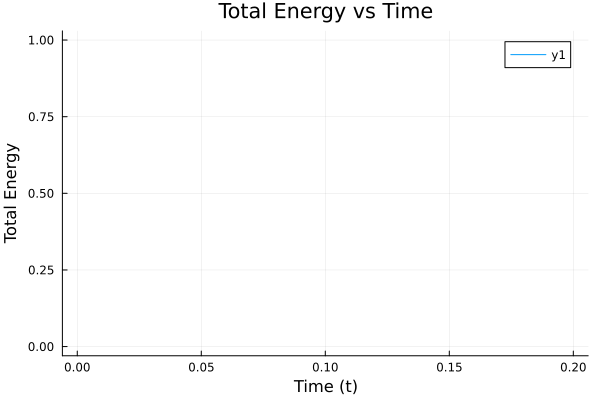

In [42]:
using Plots

# Define the time steps
time_steps = collect(0:tau:(total_steps * tau))

# Calculate the total energy at each time step
total_energy = [MD_LJ.calculate_energy(positions_final, velocities_final, Lx, Vc, fc, rcut)[1] + MD_LJ.calculate_energy(positions_final, velocities_final, Lx, Vc, fc, rcut)[2] for n in 0:total_steps]

# Plot the total energy as a function of time
plot(time_steps, total_energy, xlabel="Time (t)", ylabel="Total Energy", title="Total Energy vs Time")


64-element Vector{Vector{Float64}}:
 [1.0, 1.0]
 [1.0, 2.0]
 [1.0, 3.0]
 [1.0, 4.0]
 [1.0, 5.0]
 [1.0, 6.0]
 [1.0, 7.0]
 [1.0, 8.0]
 [2.0, 1.0]
 [2.0, 2.0]
 ⋮
 [7.0, 8.0]
 [8.0, 1.0]
 [8.0, 2.0]
 [8.0, 3.0]
 [8.0, 4.0]
 [8.0, 5.0]
 [8.0, 6.0]
 [8.0, 7.0]
 [8.0, 8.0]

64×2 Matrix{Float64}:
 -0.111878   -2.25549
  0.764959    0.768516
 -1.20505    -1.02371
 -0.0722267   0.617772
  0.31849     0.587094
  0.947294    0.267065
 -2.36409    -0.000409158
  0.657885   -1.21405
  0.820007    1.49762
  0.969933    0.258221
  ⋮          
  1.32326     1.36723
  0.498514   -0.804981
 -0.876483    1.1786
 -1.61483     1.7265
  1.05285    -1.11446
  0.553108    1.02298
  0.0318433  -0.02057
  0.0419216  -0.878715
  0.504941   -0.0890239

Total Linear Momentum: [0.0 0.0]
Initial Positions:
Initial Velocities:
Step: 1
Step: 2


Step: 3
Step: 4
Step: 5
Step: 6
Step: 7
Step: 8
Step: 9
Step: 10
Step: 11
Step: 12
Step: 13
Step: 14
Step: 15


Step: 16
Step: 17
Step: 18
Step: 19
Step: 20
Step: 21
Step: 22
Step: 23
Step: 24
Step: 25
Step: 26
Step: 27
Step: 28


Step: 29
Step: 30
Step: 31
Step: 32
Step: 33
Step: 34
Step: 35
Step: 36
Step: 37
Step: 38
Step: 39
Step: 40


Step: 41
Step: 42
Step: 43
Step: 44
Step: 45
Step: 46
Step: 47
Step: 48
Step: 49
Step: 50
Step: 51
Step: 52
Step: 53


Step: 54
Step: 55
Step: 56
Step: 57
Step: 58
Step: 59
Step: 60
Step: 61
Step: 62
Step: 63
Step: 64
Step: 65
Step: 66


Step: 67
Step: 68
Step: 69
Step: 70
Step: 71
Step: 72
Step: 73
Step: 74
Step: 75
Step: 76
Step: 77
Step: 78


Step: 79
Step: 80
Step: 81
Step: 82
Step: 83
Step: 84
Step: 85
Step: 86
Step: 87
Step: 88
Step: 89
Step: 90
Step: 91


Step: 92
Step: 93
Step: 94
Step: 95
Step: 96
Step: 97
Step: 98
Step: 99
Step: 100


┌ Info: Saved animation to /var/folders/jm/nd85t1m57dv98qh_jtqr2clh0000gn/T/jl_E7APAxotq1.gif
└ @ Plots /Users/arnab/.julia/packages/Plots/sxUvK/src/animation.jl:156


Plots.AnimatedGif("/var/folders/jm/nd85t1m57dv98qh_jtqr2clh0000gn/T/jl_E7APAxotq1.gif")
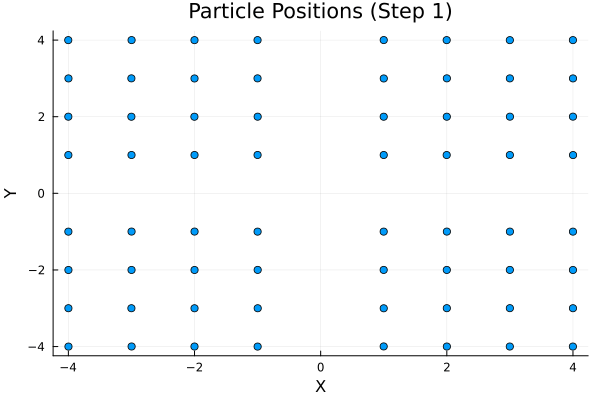

In [46]:
function verlet_integration!(positions, velocities, forces, L, tau, fc)
    # Print initial positions and velocities
    println("Initial Positions:")
    display(positions)
    println("Initial Velocities:")
    display(velocities)
    
    # Verlet integration steps
    for i in 1:length(positions)
        # Print current step
        println("Step $i:")
        
        # Update positions
        positions[i] += velocities[i] * tau + 0.5 * forces[i] * tau^2
        
        # Print updated positions
        println("Updated Positions:")
        display(positions)
        
        # Calculate new forces
        new_forces = calculate_forces(positions, L, fc)
        
        # Print new forces
        println("New Forces:")
        display(new_forces)
        
        # Update velocities
        velocities[i] += 0.5 * (forces[i] + new_forces[i]) * tau
        
        # Print updated velocities
        println("Updated Velocities:")
        display(velocities)
        
        # Update forces
        forces[i] = new_forces[i]
    end
end

